In [5]:
x=15
if 10 <= x and x <= 20 :
    print('x is between 10 and 20')

x is between 10 and 20


In [6]:
print(x)

15


# Hellow

# Hellow

In [8]:
import numpy as np
A = np.array([[1,2,3], [4,5,6]])
print(A)

[[1 2 3]
 [4 5 6]]


In [11]:
B = np.array([[7,8,9], [10,11,12]])
print(B)

[[ 7  8  9]
 [10 11 12]]


In [12]:
print(A+B)
print(A-B)

[[ 8 10 12]
 [14 16 18]]
[[-6 -6 -6]
 [-6 -6 -6]]


In [17]:
A = np.array([[1,2,3],[-1,-2,-3]])
B = np.array([[4,5,6],[-4,-5,-6],[7,8,9]])
print(A.dot(B))

[[ 17  19  21]
 [-17 -19 -21]]


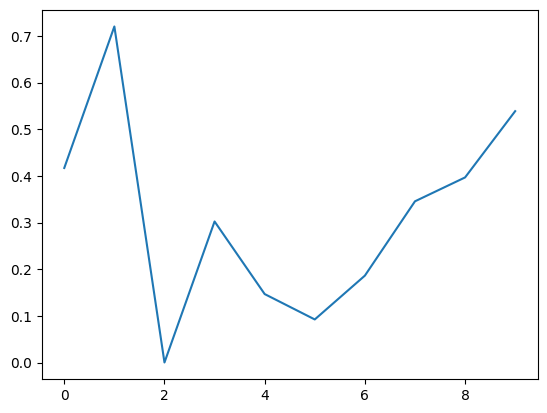

In [20]:
import numpy as np
import matplotlib.pyplot as plt # 그래프를 그리기 위해, plt는 별칭
%matplotlib inline              # 주피터 노트북에서 그래프 표시를 위해
# data 작성
np.random.seed(1)               # 난수 발생을 위한 시드(seed) 값을 1로 설정
x = np.arange(10)               # 0부터 9까지의 값을 갖는 배열을 생성하여 x에 할당
y = np.random.rand(10)          # 길이가 10인 난수 배열을 생성하여 y에 할당
# 그래프 표시
plt.plot(x,y)                   # 꺽은선 그래프를 등록
plt.show()                      # 그래프 그리기

In [22]:
def f(x):
    return (x - 2) * x * (x + 2)

In [23]:
print(f(1))

-3


In [25]:
print(f(np.array([1,2,3])))

[-3  0 15]


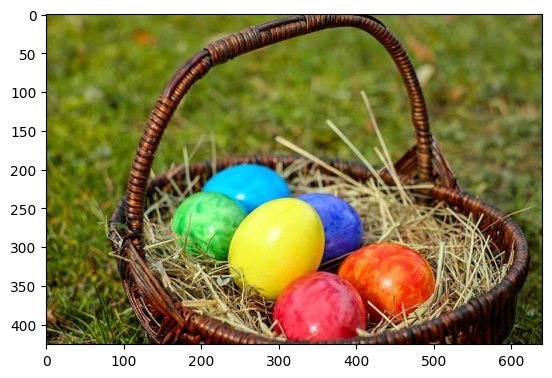

(426, 640, 3)


<function matplotlib.pyplot.show(close=None, block=None)>

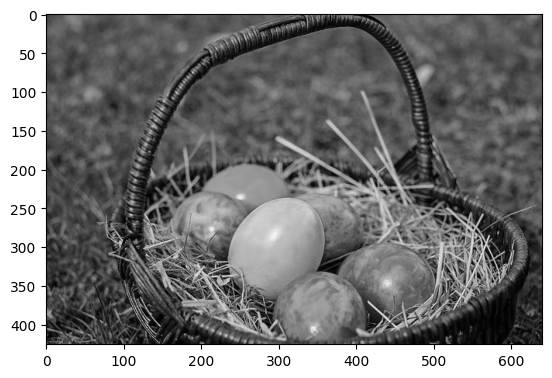

In [6]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

color_img = Image.open('fruits.jpg') #.convert('L') # 이미지 경로=./c:\Users\EMBEDDED\Desktop\new 현재 작업 폴더에 이미지 저장
plt.imshow(color_img)
plt.show()

# 이미지 객체 -> numpy 행렬
color_pixel=np.array(color_img)
print(color_pixel.shape)                           # color_pixel가 행렬로 표현되면 shape가능 print=(426, 640, 3)채널 수

gray_pixe1=color_pixel.copy()                      # color 지정, RGB는 8bit, gray(0~255)밝기

# RGB의 평균값을 넣어준다(데이터 처리에서와 달리 평균값 필요)
for y in range(gray_pixe1.shape[0]):               # for~in문
    for x in range(gray_pixe1.shape[1]):
        gray_pixe1[y,x] = np.mean(gray_pixe1[y,x]) # mean=평균값 
        
plt.imshow(gray_pixe1)                             # gray color 표현
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

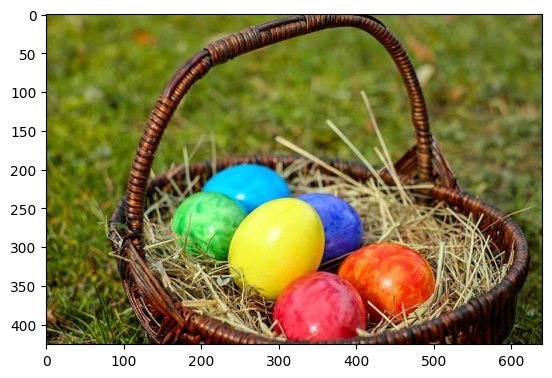

In [7]:
plt.imshow(color_pixel) # 위 코드에서 copy=깊은 복사
plt.show

(426, 640)


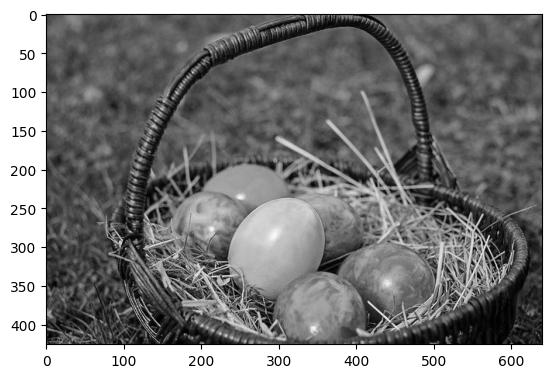

In [21]:
# 흑백 이미지를 2차원 표현
#gray_2d_pixel=gray_pixe1[:,:,0] # R값만 가져온다
print(gray_2d_pixel.shape)
plt.imshow(gray_2d_pixel,'gray')
plt.show()

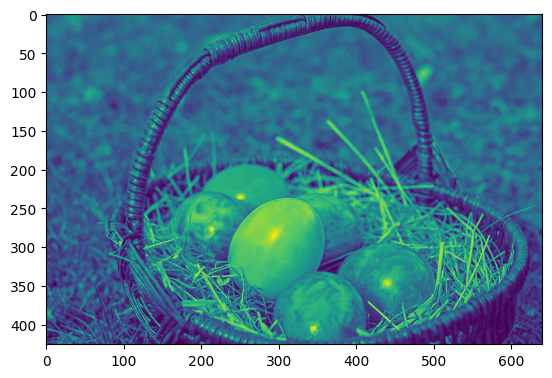

In [19]:
gray_2d_pixel=gray_pixe1[:,:,0] # R값만 가져온다
plt.imshow(gray_2d_pixel)
plt.show()

(429, 640, 3)
(1, 429, 640, 3)
(1, 429, 640, 1)
(3, 3, 1, 1)
(1, 427, 638, 1)


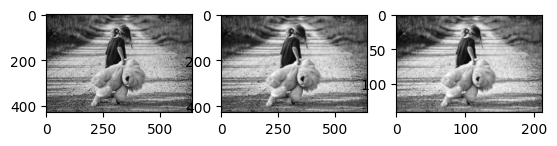

In [11]:
# 이미지 특징 추출
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt                     # 단일 플롯에 다수 이미지 그리기
import matplotlib.image as img

# 그래프 자체가 배열의 인덱스에 위치
fig=plt.figure() # 도화지 생성
ax1=fig.add_subplot(1, 3, 1)                        # 이미지 삽입 ()=1행,3열,인덱스
ax2=fig.add_subplot(1, 3, 2)                        # add_subplot_한 화면에 여러개 그리기
ax3=fig.add_subplot(1, 3, 3)
ori_img=img.imread('girl.jpg') # 원본

ax1.imshow(ori_img)
print(ori_img.shape)

# convolution -> API
# API -> 4차원 (이미지 개수, 세로, 가로, 채널)
# (429, 640, 3) -> (1, 429, 640, 3)로 변경
input_image = ori_img.reshape((1,) + ori_img.shape) # tuple + tiple(수정 불가능 배열)
input_image = input_image.astype(np.float32)        # 정수값 -> tf에서 float처리
print(input_image.shape)

ch1_input_image=input_image[:,:,:,0:1]              # 채널 수를 1로 변경_데이터 양을 줄여 계산을 간단하게
print(ch1_input_image.shape)

# 입력 데이터를 필터가 순회하며 불필요한 정보를 걸러내고 중요한 특징만 추출해 만든 출력(행렬)
filter = np.array([[[[1]],[[0]],[[1]]],
                   [[[1]],[[0]],[[1]]],
                   [[[1]],[[0]],[[1]]]])

print(filter.shape) # 3행 3열 뒤에 1,1은 의미x

conv2d=tf.nn.conv2d( # filter와 stride 작용으로 특징맵의 크기는 입력 데이터보다 작아짐(손실)
    ch1_input_image,
    filter,
    strides=[1,1,1,1],                              # 이동 간격
    padding='VALID'                                 # 패딩을 고려x, 원래값으로    
)

conv2d_result=conv2d.numpy()
print(conv2d_result.shape)

t_img=conv2d_result[0,:,:,:]
ax2.imshow(t_img,cmap='gray')

# pooling
pool = tf.nn.max_pool( # pooling=사이즈가 줄어들며 특징이 더 도드라짐
    conv2d_result,
    ksize=[1,3,3,1],
    strides=[1,3,3,1],
    padding='VALID'
)
pool_result=pool.numpy()
t_img=pool_result[0,:,:,:] 
ax3.imshow(t_img, cmap='gray')


Found 2004 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
(20, 150, 150, 3)
(20,)
[0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1.]


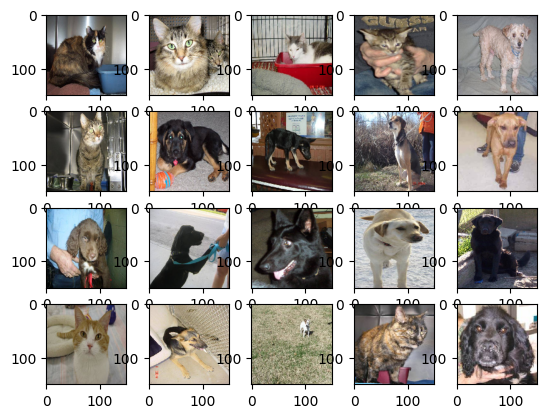

In [1]:
# ImageDataGenerator 데이터 변형(증강)

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# 경로 지정 리눅스형태로 ./위치/파일명
train_dir='./cat_dog_small/train'
validation_dir='./cat_dog_small/validation'

# 생성 
train_datagen=ImageDataGenerator(rescale=1/255) # 0~1까지 scale정규화
validation_datagen=ImageDataGenerator(rescale=1/255)

# 설정
train_generator=train_datagen.flow_from_directory(
    train_dir,                  # 위치
    classes=['cats', 'dogs'],   # 타겟, 레이블
    target_size=(150, 150),     # 사이즈 전처리
    batch_size=20,
    class_mode='binary'
)

validation_generator=validation_datagen.flow_from_directory(
    validation_dir, 
    classes=['cats', 'dogs'], 
    target_size=(150, 150), 
    batch_size=20,
    class_mode='binary'
)

# generator 동작확인 
# 한번에 20개 이미지 가져와서 출력
fig=plt.figure()
axs=[]

for i in range(20):
    axs.append(fig.add_subplot(4,5,i+1))
    
for data_batch, label_batch in train_generator:
    print(data_batch.shape)
    
    for idx, img_data in enumerate(data_batch):
        axs[idx].imshow(img_data)
        
    print(label_batch.shape)
    print(label_batch)
    
    break


In [17]:
# 모델링
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential # model, box
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# model생성
model=Sequential()          # 입력층부터 출력층까지 차례대로 쌓아가는 것으로 모델을 구성

# model layer추가

##1
model.add(Conv2D(           # 특징을 추출
    filters=32,             # 필터의 수 (즉, 출력 채널의 수)
    kernel_size=(3,3),      # 필터의 크기
    strides=(1,1),          # 필터를 이동시키는 간격 (기본값은 1)
    padding='valid',        # 경계 처리 방법
    activation='relu',      # 활성화 함수
    input_shape=(150,150,3) # 입력 데이터의 형태와 맞춰서 튜플을 입력
))

model.add(MaxPooling2D(     # 중요한 특징을 추출하고 입력 데이터의 크기를 줄이는 것
    pool_size=(2,2)
))
##2
model.add(Conv2D( 
    filters=64,
    kernel_size=(3,3),
    strides=(1,1),
    padding='valid',
    activation='relu'    
))

model.add(MaxPooling2D( 
    pool_size=(2,2)
))
##3
model.add(Conv2D( 
    filters=128,
    kernel_size=(3,3),
    strides=(1,1),
    padding='valid',
    activation='relu'    
))

model.add(MaxPooling2D( 
    pool_size=(2,2)
))
##4
model.add(Conv2D( 
    filters=256,
    kernel_size=(3,3),
    strides=(1,1),
    padding='valid',
    activation='relu'    
))

model.add(MaxPooling2D( 
    pool_size=(2,2)
))
##5
model.add(Conv2D( 
    filters=512,
    kernel_size=(3,3),
    strides=(1,1),
    padding='valid',
    activation='relu'    
))

model.add(MaxPooling2D( 
    pool_size=(2,2)
))

model.add(Flatten())                     # 입력 데이터의 형태를 변경하지 않고 1D 벡터로 변환
model.add(Dense(                         # 출력 클래스에 대한 확률값을 계산
    units=1,
    activation='sigmoid'                 # 계산 함수
))

model.summary()                          # 정보
model.compile(
    optimizer=Adam(learning_rate=0.001), # 최적화 방법을 설정
    loss='binary_crossentropy',          # 손실 함수를 설정
    metrics=['acc']                      # 평가 지표를 설정, (Accuracy)정확도
)

model.fit(                               # 입력 data와 정답 data를 모델에 입력하여 모델의 가중치 업데이트=모델 학습
    train_generator,
    steps_per_epoch = 100,
    epochs = 30,                         # 모델이 학습할 총 횟수를 나타내는 정수 값. 기본값은 1
    validation_data = validation_generator, # 훈련 데이터=검증 데이터
    validation_steps = 50,               # 검증 데이터셋에서 몇 개의 배치를 사용할 것인지를 지정
    verbose = 1,                         # 학습 과정을 0, 1, 2 중 하나의 값으로 결정
)


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 17, 17, 128)     

In [2]:
from tensorflow.keras.applications import VGG16

model_base=VGG16(
    weights='imagenet', # 외부 imagenet에서 이미지를 받는다
    include_top=False, # filter만 가져옴
    input_shape=(150,150,3)
)

model_base.summary()



58889256/58889256 [==============================] - 11s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                           

In [7]:
# train_generator 사용 위해 상단 코드 실행 후 작성
# VGG16 -> 전이학습
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# 1. 모델생성
model=Sequential()

# 2. VGG16으로 대체
model_base=VGG16(
    weights='imagenet', # 외부 imagenet에서 이미지를 받는다
    include_top=False, # filter만 가져옴
    input_shape=(150,150,3)
)

# 3. 특성 추출
model_base.trainable=False # 이미 완성된 필터만 사용, train(변경)하지 않는다

model.add(model_base)

model.add(Flatten())

model.add(Dense(
    units=1,
    activation='sigmoid'
)) 
model.summary()

# 모델 설정
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['acc']
)

# 학습
model.fit(
    train_generator,
    steps_per_epoch=100, #2000/100=100
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50, # 1000/20=50
    verbose=1
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 8193      
                                                                 
Total params: 14722881 (56.16 MB)
Trainable params: 8193 (32.00 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________
Epoch 1/30


ValueError: in user code:

    File "c:\Users\EMBEDDED\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\EMBEDDED\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\EMBEDDED\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\EMBEDDED\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\EMBEDDED\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "c:\Users\EMBEDDED\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\compile_utils.py", line 252, in __call__
        self.build(y_pred)
    File "c:\Users\EMBEDDED\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\compile_utils.py", line 194, in build
        self._losses = tf.nest.map_structure(
    File "c:\Users\EMBEDDED\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\compile_utils.py", line 365, in _get_loss_object
        loss = losses_mod.get(loss)
    File "c:\Users\EMBEDDED\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses.py", line 2965, in get
        return deserialize(identifier, use_legacy_format=use_legacy_format)
    File "c:\Users\EMBEDDED\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses.py", line 2912, in deserialize
        return legacy_serialization.deserialize_keras_object(
    File "c:\Users\EMBEDDED\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\saving\legacy\serialization.py", line 537, in deserialize_keras_object
        raise ValueError(

    ValueError: Unknown loss function: 'binary_crossenttopy'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.
